<a href="https://colab.research.google.com/github/tanjummotin/Pizza-vs-Ice-cream-classification-with-SVM-classifier-and-HOG-/blob/main/Copy_of_Pizza_vs_Icecream_Binary_Classification_with_SVM_classifier_and_HOG_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os
import cv2
import numpy as np

from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from zipfile import ZipFile
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab.patches import cv2_imshow

In [ ]:
# Path to the zipped dataset file in Google Drive
zip_path = '/content/drive/MyDrive/DIP LAB/DIP_Lab3_Binary classification using SVM classifier/ice cream vs pizza.zip'

# Destination path to extract the dataset
extract_path = '/content/drive/MyDrive/DIP LAB/DIP_Lab3_Binary classification using SVM classifier/ice cream vs pizza'


In [ ]:
# Extract the dataset
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)




In [ ]:
# Set the path to the extracted dataset directory
dataset_path = os.path.join(extract_path, 'dataset/train')

In [ ]:
# Initialize empty lists to store image paths and corresponding labels
image_paths = []
labels = []

# Iterate over each subdirectory (each class)
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Iterate over each image in the subdirectory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image_paths.append(image_path)
            labels.append(class_name)


In [ ]:
# Initialize an empty list to store the HOG features
hog_features = []

# Iterate over each image path
for image_path in image_paths:
   # print("Processing:", image_path)  # Print image path for debugging

        # Read the image
        image = cv2.imread(image_path)
        image=cv2.resize(image, (64, 128))
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Compute HOG features
        hog_feature = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        # Append the HOG feature to the list
        hog_features.append(hog_feature)





In [ ]:
# Find the maximum number of features among all HOG feature vectors
max_features = max(len(x) for x in hog_features)

# Pad the HOG feature vectors to have consistent dimensions
hog_features_padded = []
for hog_feature in hog_features:
    padding_length = max_features - len(hog_feature)
    padded_feature = np.pad(hog_feature, (0, padding_length), mode='constant')
    hog_features_padded.append(padded_feature)






In [ ]:
# Convert the HOG features and labels to NumPy arrays
X = np.array(hog_features_padded).astype(np.float32)
y = np.array(labels)


In [ ]:
X.shape

(718, 3780)

In [ ]:
pca = PCA()
pca.fit(X)

# Determine the number of principal components to keep
k = 3000

# Select the top-K principal components
selected_features = pca.transform(X)[:,:k]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)


In [ ]:
# Encode the labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Train the SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train_encoded)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

In [ ]:
# Generate a classification report
report = classification_report(y_test, y_pred_decoded, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

    icecream       0.85      0.74      0.80        86
       pizza       0.68      0.81      0.74        58

    accuracy                           0.77       144
   macro avg       0.77      0.78      0.77       144
weighted avg       0.78      0.77      0.77       144



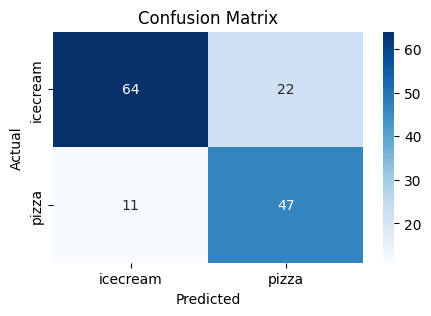

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_decoded)

# Get class labels for axis ticks and color map for visualization
class_labels = label_encoder.classes_
cmap = plt.cm.Blues

# Plot the confusion matrix as a heatmap with labels and colored cells
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

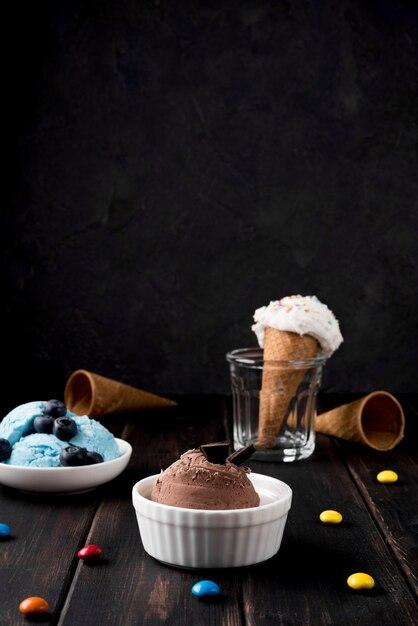

Predicted label: icecream


In [ ]:
# Load the single test image
test_image_path = '/content/drive/MyDrive/DIP LAB/DIP_Lab3_Binary classification using SVM classifier/ice cream vs pizza/dataset/test/icecream/00124_jpg.rf.cbfd9b294fb345cac66fea8d648861dd.jpg'
test_image = cv2.imread(test_image_path)
cv2_imshow(test_image)

test_image = cv2.resize(test_image, (64, 128))
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Compute HOG features for the test image
hog_feature = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)

hog_feature_padded = np.pad(hog_feature, (0, max_features - len(hog_feature)), mode='constant')
hog_feature_padded = hog_feature_padded.reshape(1, -1)

# Transform the test image features using PCA
test_features = pca.transform(hog_feature_padded)[:, :k]

# Make the prediction using the trained SVM classifier
predicted_label_encoded = clf.predict(test_features)

predicted_label = label_encoder.inverse_transform(predicted_label_encoded)[0]

# Print the predicted label
print("Predicted label:", predicted_label)


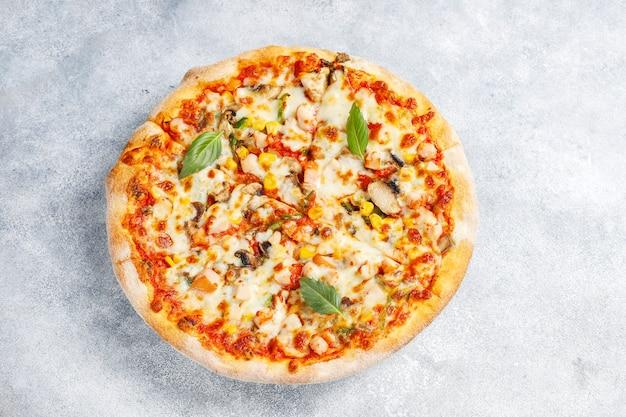

Predicted label: pizza


In [ ]:
# Load the single test image
test_image_path = '/content/drive/MyDrive/DIP LAB/DIP_Lab3_Binary classification using SVM classifier/ice cream vs pizza/dataset/test/pizza/00242_jpg.rf.6e707e577fd7052aeed4de9171b86df7.jpg'
test_image = cv2.imread(test_image_path)
cv2_imshow(test_image)
test_image = cv2.resize(test_image, (64, 128))
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Compute HOG features for the test image
hog_feature = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
hog_feature_padded = np.pad(hog_feature, (0, max_features - len(hog_feature)), mode='constant')
hog_feature_padded = hog_feature_padded.reshape(1, -1)

# Transform the test image features using PCA
test_features = pca.transform(hog_feature_padded)[:, :k]

# Make the prediction using the trained SVM classifier
predicted_label_encoded = clf.predict(test_features)
predicted_label = label_encoder.inverse_transform(predicted_label_encoded)[0]

# Print the predicted label
print("Predicted label:", predicted_label)